In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df=pd.read_csv("Covid cases in India.csv")

In [5]:
df

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,226,1,3
1,2,Andaman and Nicobar Islands,10,0,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,26,0,0
4,5,Bihar,30,0,1
5,6,Chandigarh,18,0,0
6,7,Chhattisgarh,9,3,0
7,8,Delhi,503,18,7
8,9,Goa,7,0,0
9,10,Gujarat,122,18,11


In [6]:
df.drop(['S. No.'],axis=1,inplace=True)

In [7]:
df

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,Andhra Pradesh,226,1,3
1,Andaman and Nicobar Islands,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,26,0,0
4,Bihar,30,0,1
5,Chandigarh,18,0,0
6,Chhattisgarh,9,3,0
7,Delhi,503,18,7
8,Goa,7,0,0
9,Gujarat,122,18,11


In [9]:
df['Total Cases']=df['Total Confirmed cases']+df['Cured/Discharged/Migrated']+df['Deaths']

In [10]:
df

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths,Total Cases
0,Andhra Pradesh,226,1,3,230
1,Andaman and Nicobar Islands,10,0,0,10
2,Arunachal Pradesh,1,0,0,1
3,Assam,26,0,0,26
4,Bihar,30,0,1,31
5,Chandigarh,18,0,0,18
6,Chhattisgarh,9,3,0,12
7,Delhi,503,18,7,528
8,Goa,7,0,0,7
9,Gujarat,122,18,11,151


In [12]:
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till 6 April,2020 in India is ',total_cases_overall)

The total number of cases till 6 April,2020 in India is  4468


In [14]:
df['Active Cases']=df['Total Cases']-(df['Deaths']+df['Cured/Discharged/Migrated'])

In [15]:
df

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,226,1,3,230,226
1,Andaman and Nicobar Islands,10,0,0,10,10
2,Arunachal Pradesh,1,0,0,1,1
3,Assam,26,0,0,26,26
4,Bihar,30,0,1,31,30
5,Chandigarh,18,0,0,18,18
6,Chhattisgarh,9,3,0,12,9
7,Delhi,503,18,7,528,503
8,Goa,7,0,0,7,7
9,Gujarat,122,18,11,151,122


In [16]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,226,1,3,230,226
1,Andaman and Nicobar Islands,10,0,0,10,10
2,Arunachal Pradesh,1,0,0,1,1
3,Assam,26,0,0,26,26
4,Bihar,30,0,1,31,30
5,Chandigarh,18,0,0,18,18
6,Chhattisgarh,9,3,0,12,9
7,Delhi,503,18,7,528,503
8,Goa,7,0,0,7,7
9,Gujarat,122,18,11,151,122


In [17]:
Total_Active_Cases=df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [18]:
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,777
Tamil Nadu,584
Delhi,528
Kerala,371
Telengana,362
Rajasthan,274
Uttar Pradesh,248
Andhra Pradesh,230
Madhya Pradesh,174


In [19]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,777
Tamil Nadu,584
Delhi,528
Kerala,371
Telengana,362
Rajasthan,274
Uttar Pradesh,248
Andhra Pradesh,230
Madhya Pradesh,174


## Graphical Represantaion

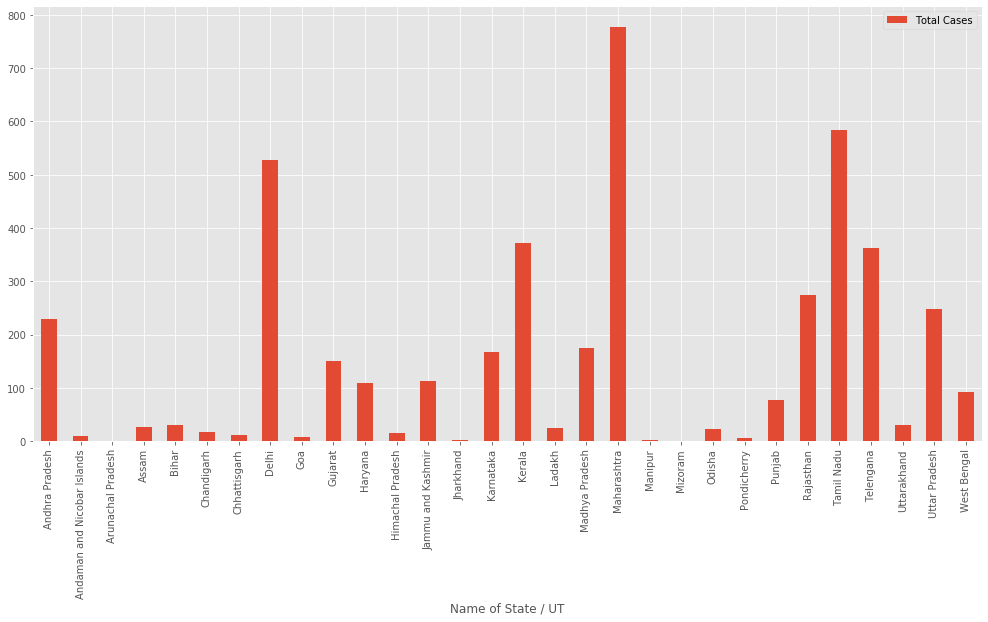

In [20]:
#Pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()
#Plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

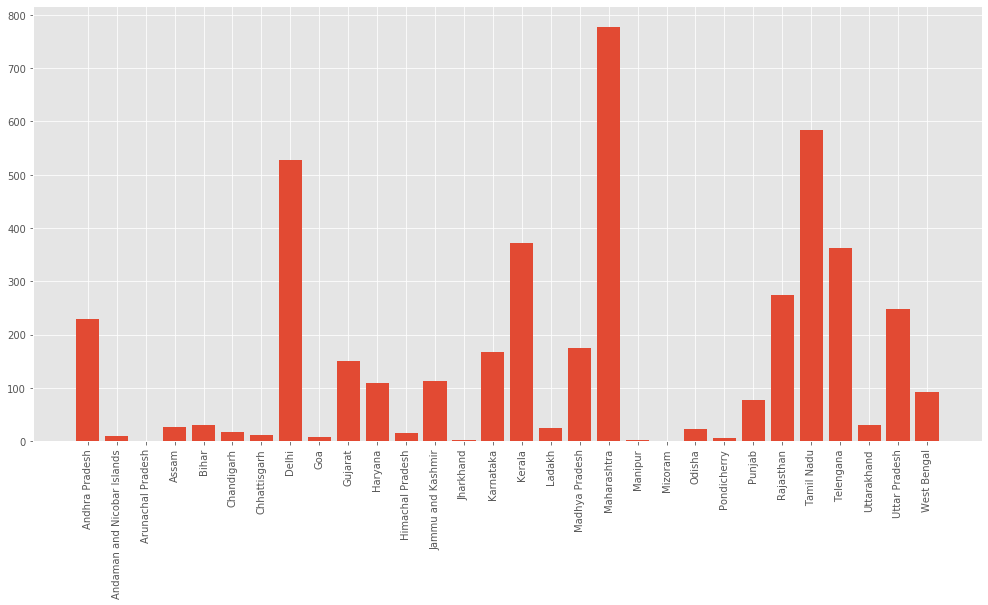

In [21]:
#Matplotlib vis

plt.bar(df['Name of State / UT'],df['Total Cases'])
plt.xticks(rotation=90)
plt.show()

In [22]:
px.bar(df,x='Name of State / UT',y='Total Cases')

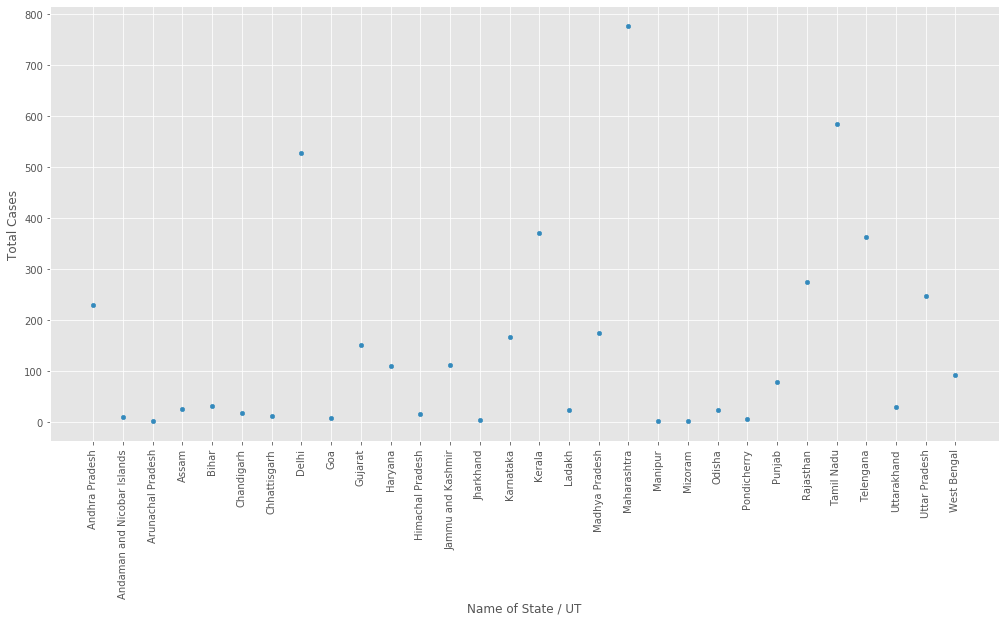

In [23]:
df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')
plt.xticks(rotation=90)
plt.show()

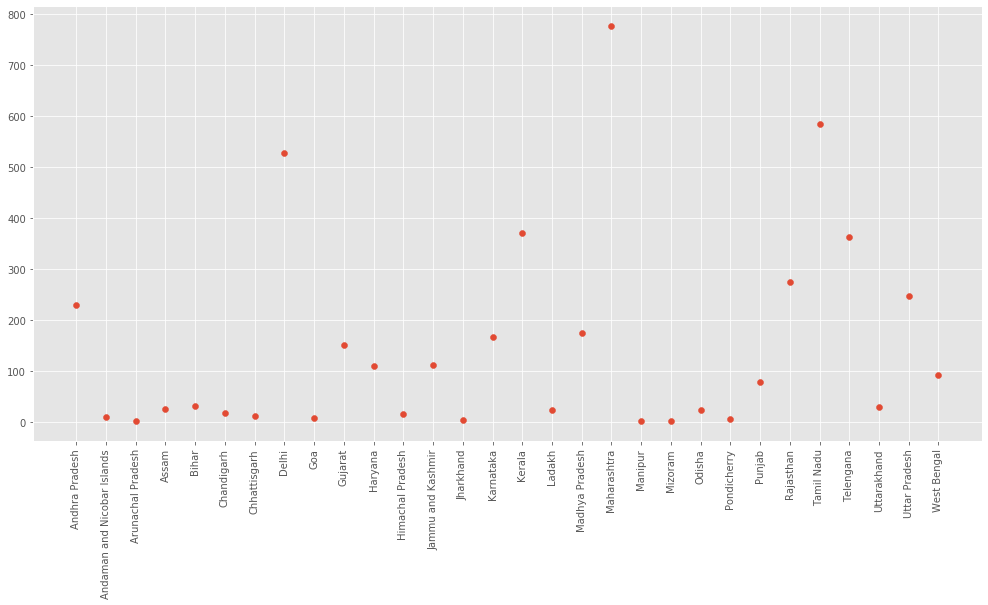

In [24]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])
plt.xticks(rotation=90)
plt.show()

In [25]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=20)
px.scatter(df,x='Name of State / UT',y='Total Cases')

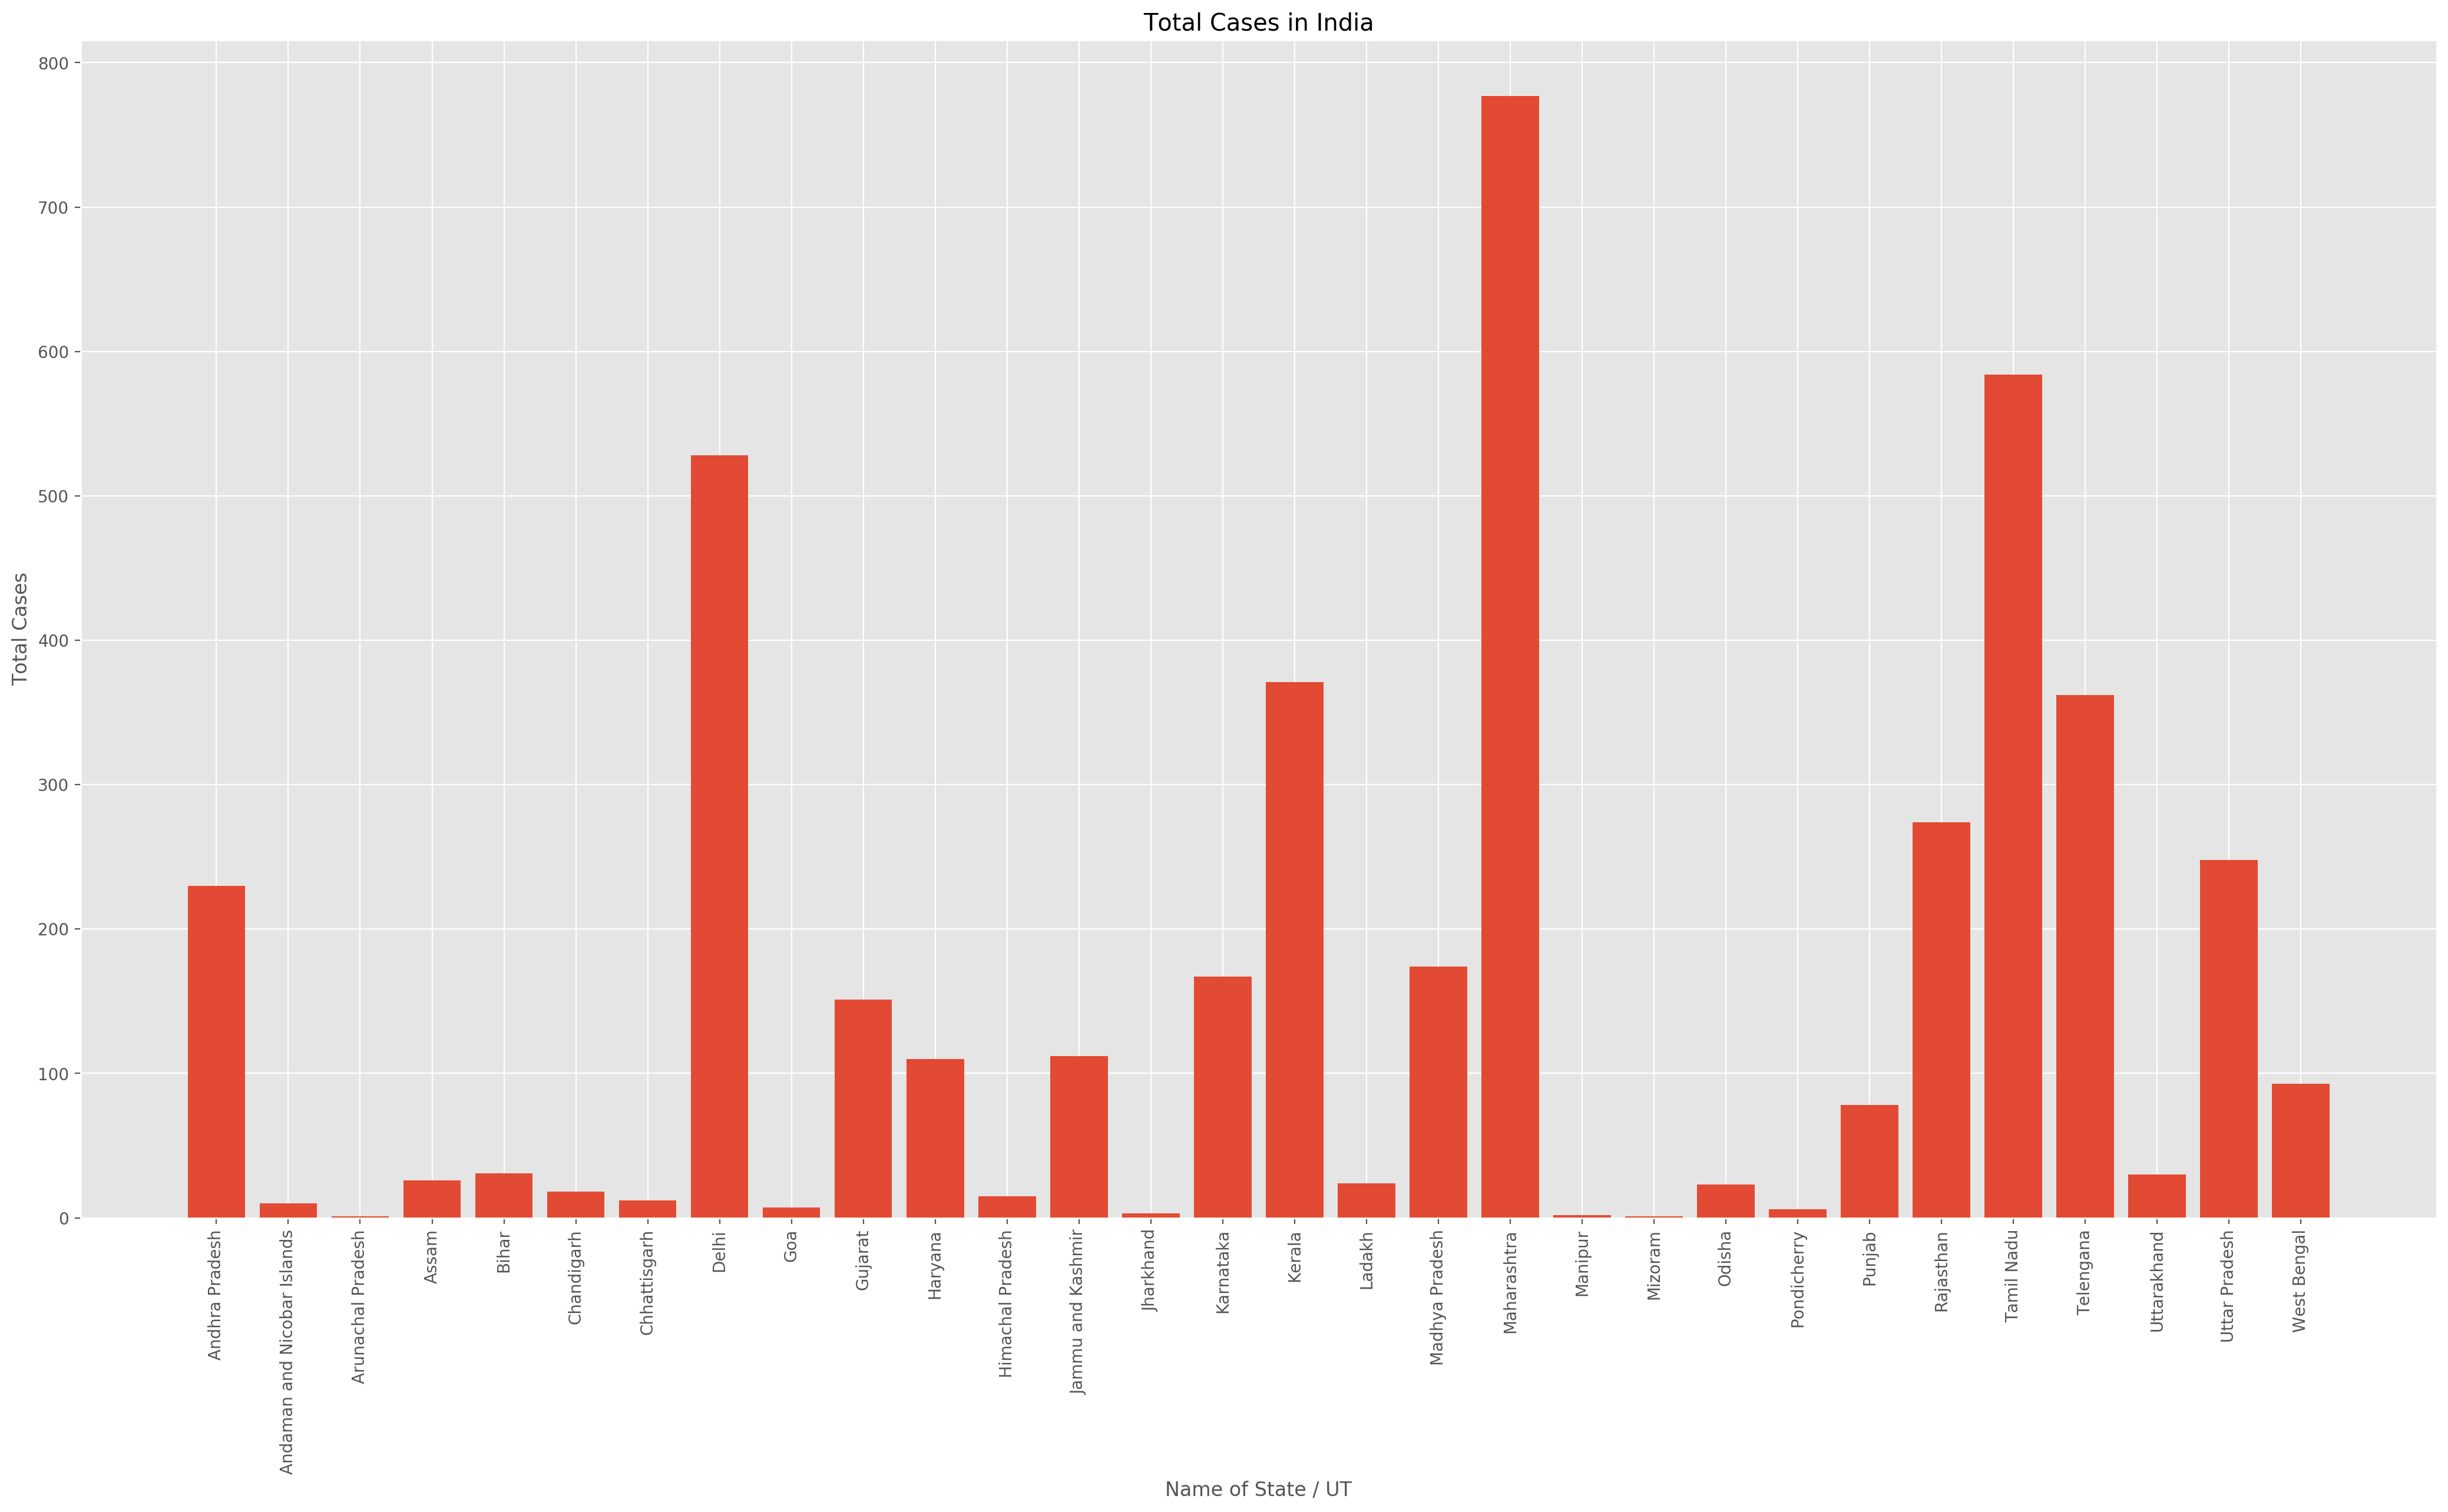

In [27]:
#Matplotlib
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.xticks(rotation=90)
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [34]:
Indian_Cord=pd.read_csv("Indian Coordinates.csv")

In [35]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [36]:
df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')

In [37]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,226,1,3,230,226
1,Chandigarh,30.719997,76.780006,18,0,0,18,18
2,Delhi,28.669993,77.230004,503,18,7,528,503
3,Haryana,28.450006,77.019991,84,25,1,110,84
4,Jammu and Kashmir,33.450000,76.240000,106,4,2,112,106
5,Karnataka,12.570381,76.919997,151,12,4,167,151
6,Kerala,8.900373,76.569993,314,55,2,371,314
7,Maharashtra,19.250232,73.160175,690,42,45,777,690
8,Odisha,19.820430,85.900017,21,2,0,23,21
9,Pondicherry,11.934994,79.830000,5,1,0,6,5


In [44]:
map=folium.Map(location=[21,80],zoom_start=4.5,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.2,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [45]:
map

# How corona virus is rising Globaly

In [47]:
dbd_India=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [48]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
...,...,...,...,...
62,2020-04-01,1998,601,18.0
63,2020-04-02,2543,545,19.0
64,2020-04-03,3059,516,20.0
65,2020-04-04,3588,529,21.0


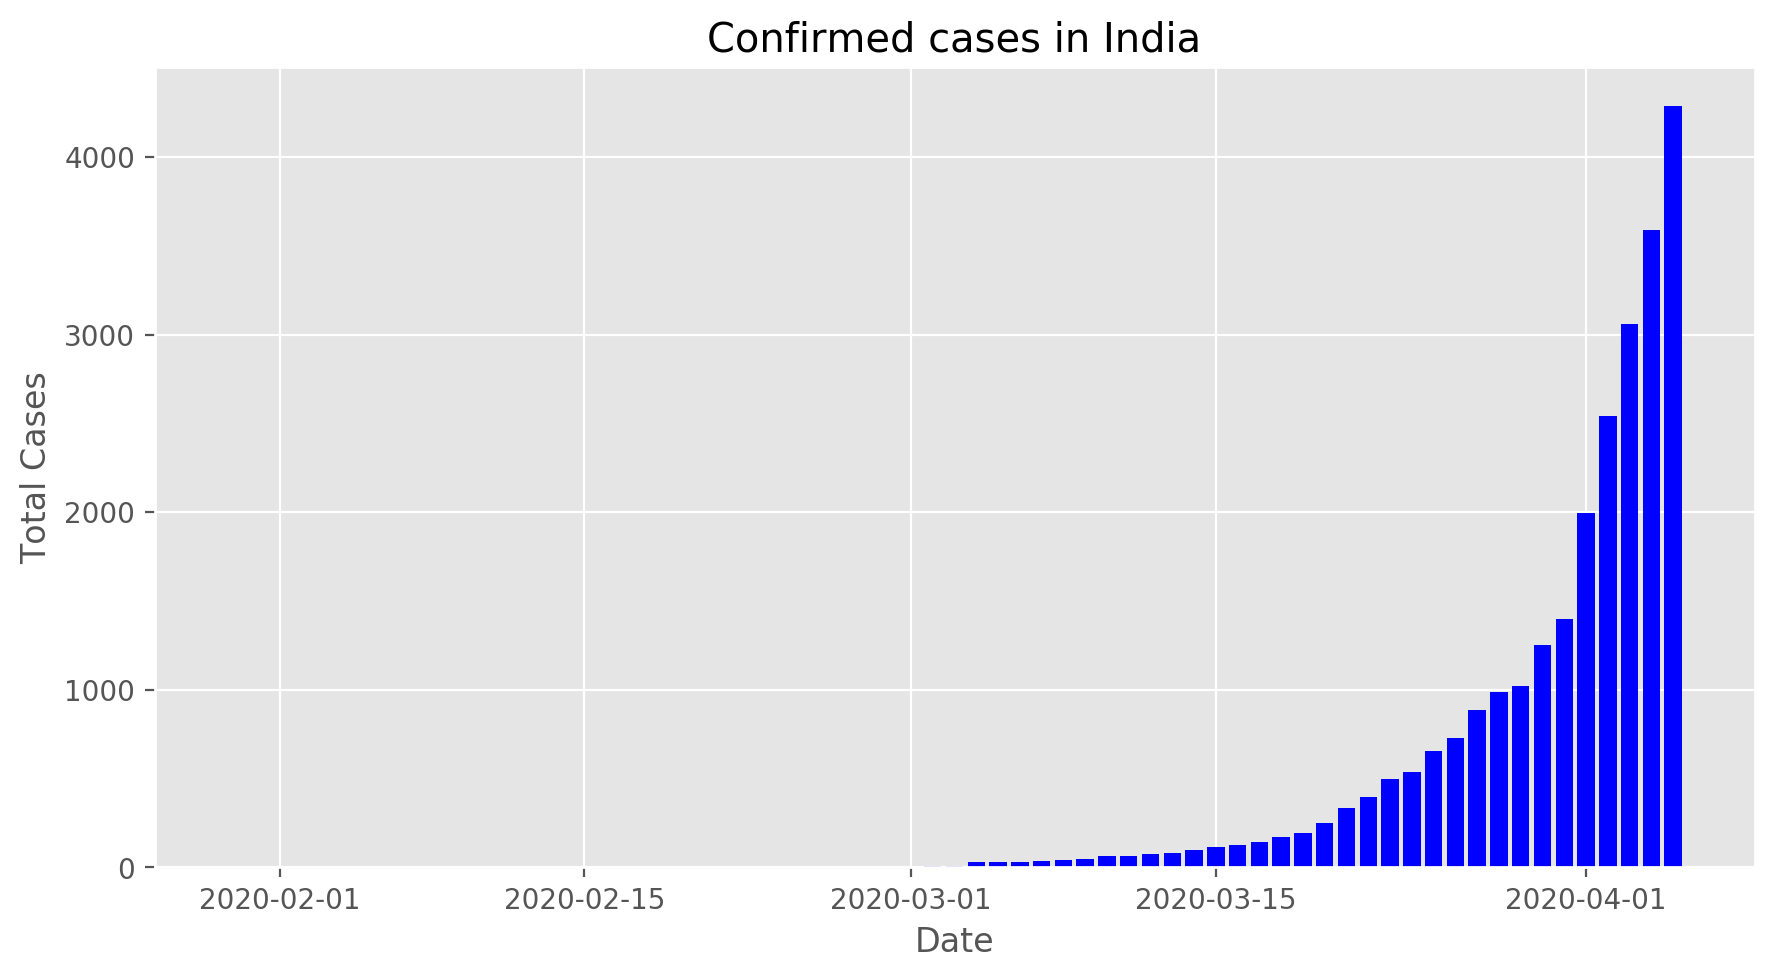

In [49]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [50]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

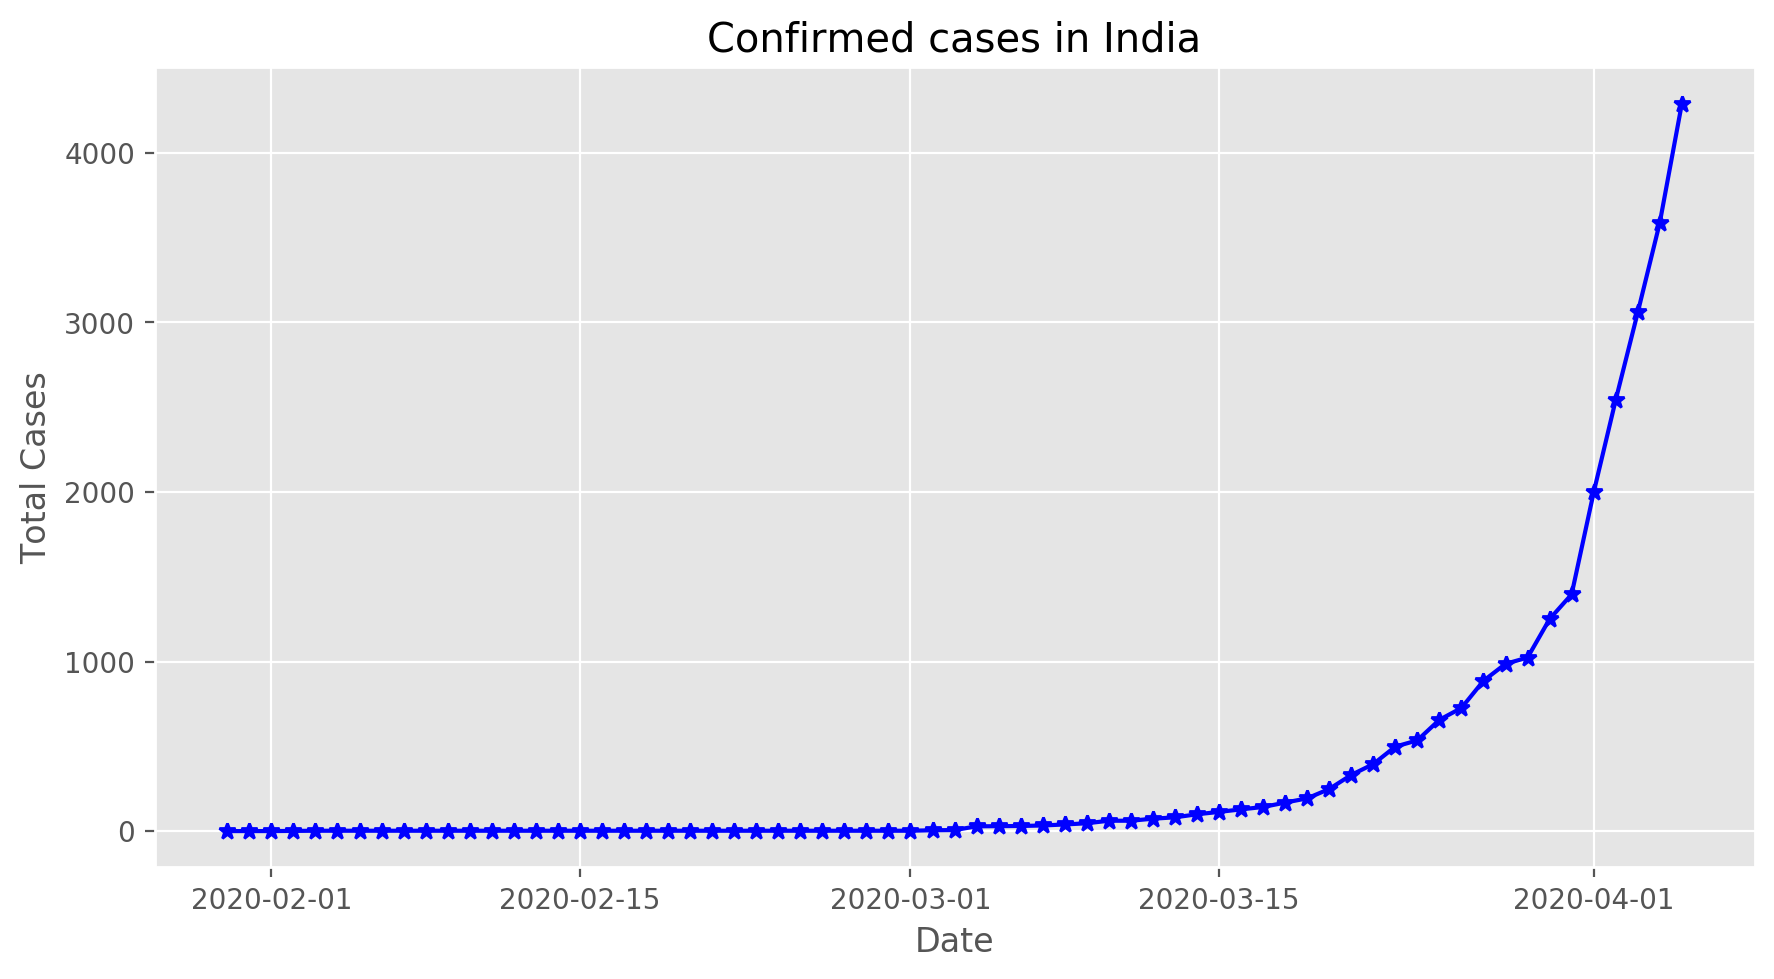

In [51]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.scatter(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [52]:
#Plotly
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [53]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))

In [54]:
#Subplots using Bar Graph

In [55]:
from plotly.subplots import make_subplots

In [56]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [57]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

## World Coronavirus

In [58]:
df=pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])

In [59]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [60]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12564,12565,04/06/2020,Wyoming,US,2020-04-06 23:28:35,210.0,0.0,0.0
12565,12566,04/06/2020,Xinjiang,Mainland China,2020-04-06 23:28:35,76.0,3.0,73.0
12566,12567,04/06/2020,Yukon,Canada,2020-04-06 23:28:35,6.0,0.0,0.0
12567,12568,04/06/2020,Yunnan,Mainland China,2020-04-06 23:28:35,184.0,2.0,172.0


In [61]:
df.query('Country=="UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12454,12455,04/06/2020,Falkland Islands (Islas Malvinas),UK,2020-04-06 23:28:35,2.0,0.0,0.0
12462,12463,04/06/2020,Gibraltar,UK,2020-04-06 23:28:35,109.0,0.0,52.0
12484,12485,04/06/2020,Isle of Man,UK,2020-04-06 23:28:35,139.0,1.0,55.0
12504,12505,04/06/2020,Montserrat,UK,2020-04-06 23:28:35,6.0,0.0,0.0


In [62]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
...,...,...,...,...
04/02/2020,3509730,1013157.0,52983.0,210263.0
04/03/2020,3608955,1095917.0,58787.0,225796.0
04/04/2020,3720110,1197405.0,64606.0,246152.0


In [63]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [64]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))


In [65]:
df_confirmed=pd.read_csv('time_series_covid_19_confirmed.csv')

In [66]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [67]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [68]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,36,01/22/2020,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,36.00000,138.000000,...,1693,1866,1866,1953,2178,2495,2617,3139,3139,3654
1,74,01/23/2020,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0,36.00000,138.000000,...,1693,1866,1866,1953,2178,2495,2617,3139,3139,3654
2,120,01/24/2020,NaN,Japan,2020-01-24 17:00:00,2.0,0.0,0.0,36.00000,138.000000,...,1693,1866,1866,1953,2178,2495,2617,3139,3139,3654
3,161,01/25/2020,NaN,Japan,2020-01-25 17:00:00,2.0,0.0,0.0,36.00000,138.000000,...,1693,1866,1866,1953,2178,2495,2617,3139,3139,3654
4,207,01/26/2020,NaN,Japan,2020-01-26 16:00:00,4.0,0.0,1.0,36.00000,138.000000,...,1693,1866,1866,1953,2178,2495,2617,3139,3139,3654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,12107,04/05/2020,NaN,Western Sahara,2020-04-05 23:13:44,4.0,0.0,0.0,24.21550,-12.885800,...,0,0,0,0,0,0,0,0,4,4
6720,12427,04/06/2020,NaN,Western Sahara,2020-04-06 23:28:35,4.0,0.0,0.0,24.21550,-12.885800,...,0,0,0,0,0,0,0,0,4,4
6721,12218,04/05/2020,Saint Pierre and Miquelon,France,2020-04-05 23:13:44,1.0,0.0,0.0,46.88520,-56.315900,...,0,0,0,0,0,0,0,0,1,1
6722,12538,04/06/2020,Saint Pierre and Miquelon,France,2020-04-06 23:28:35,1.0,0.0,0.0,46.88520,-56.315900,...,0,0,0,0,0,0,0,0,1,1


In [69]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",
                      hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",
                      color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Forecasting Using fbprophet

In [70]:
from fbprophet import Prophet

In [71]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [72]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [73]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12
82,2020-04-13


In [74]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,1.468555e+06,1.429598e+06,1.505670e+06
79,2020-04-10,1.536919e+06,1.493857e+06,1.576866e+06
80,2020-04-11,1.606790e+06,1.562717e+06,1.652502e+06
81,2020-04-12,1.668670e+06,1.617196e+06,1.725202e+06
82,2020-04-13,1.731460e+06,1.680496e+06,1.793302e+06


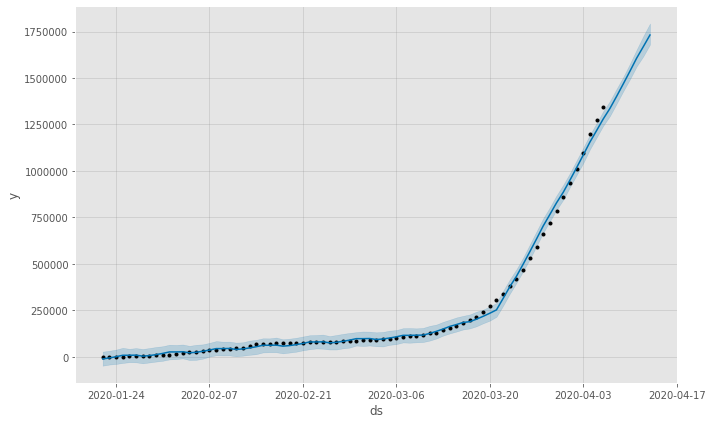

In [75]:
confirmed_forecast_plot = m.plot(forecast)

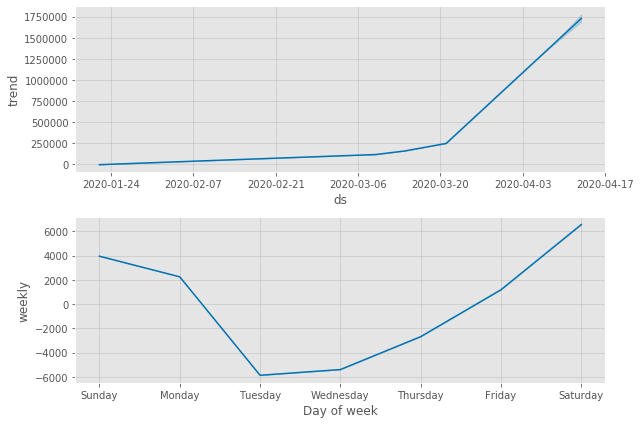

In [76]:
confirmed_forecast_plot =m.plot_components(forecast)

In [77]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [78]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12
82,2020-04-13


In [79]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,78356.250778,74972.781997,81855.663021
79,2020-04-10,82267.066262,78465.277893,85824.987880
80,2020-04-11,86215.972576,82221.775821,90020.180196
81,2020-04-12,89771.991602,85806.656316,93551.621153
82,2020-04-13,93437.192430,89369.814883,97388.794730


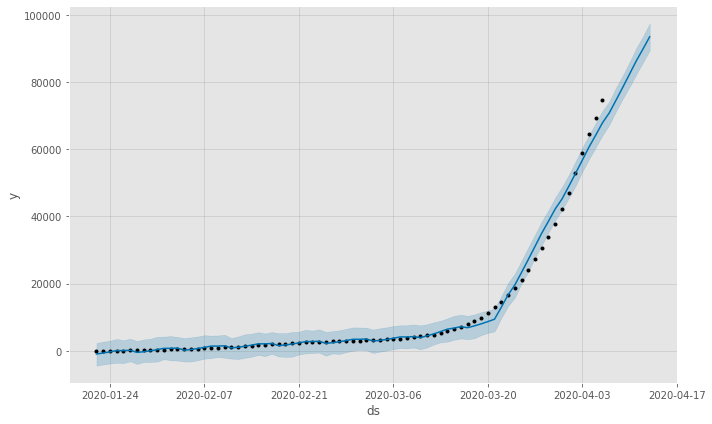

In [80]:
deaths_forecast_plot = m.plot(forecast)

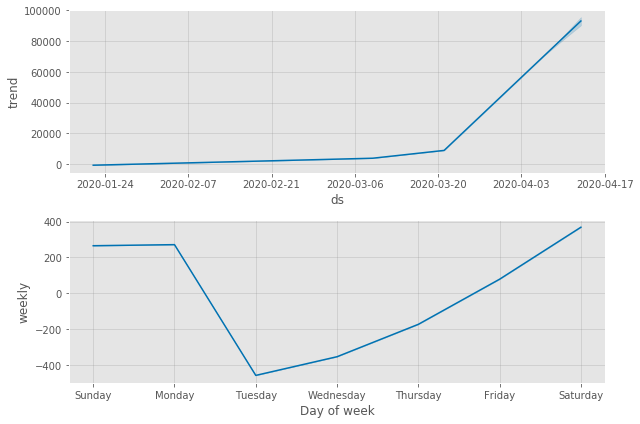

In [81]:
deaths_forecast_plot = m.plot_components(forecast)